In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
beamfiles = ["beam_1.txt", "beam_2.txt", "beam_3.txt", "beam_4.txt", "beam_5.txt"]
dfbeams = []
dfbeams_clean = []
for i in range(0,len(beamfiles)):
  dfbeams.append(pd.read_csv(beamfiles[i], sep=" ", header = None, skiprows= 2, names = ["#", "pb", "field", "pb_type", "E", "pb_nprim", "FWHM", "x0", "y0", "z0", "f_x", "f_y", "f_z", "u_x", "u_y", "u_z", "l_x", "l_y", "l_z"]))
  dfbeams_clean.append(dfbeams[i].drop(["#", "pb", "pb_type", "E", "pb_nprim", "u_x", "u_y", "u_z", "l_x", "l_y", "l_z"], axis = 1))

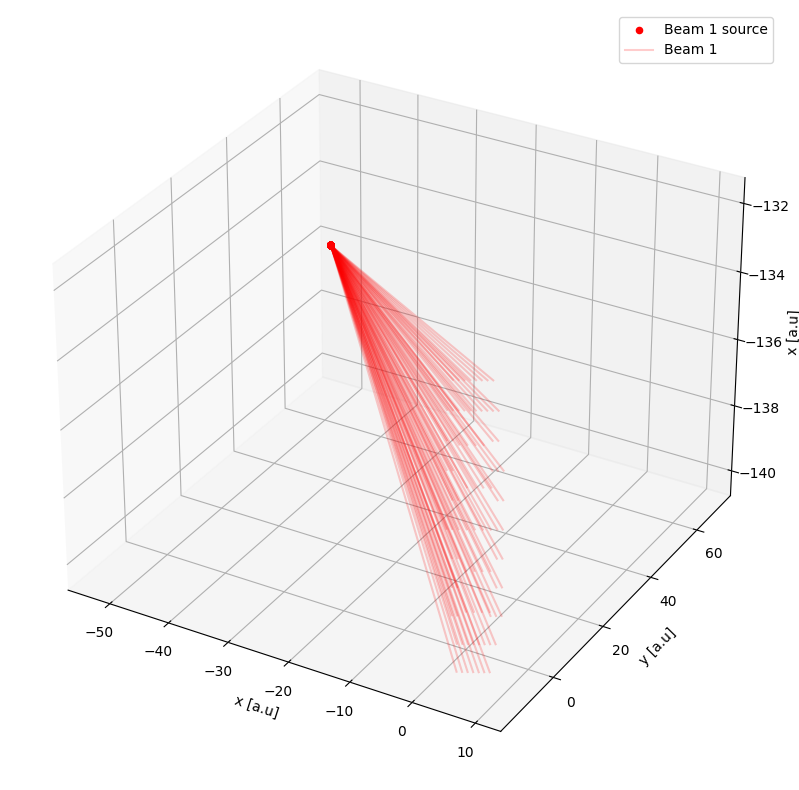

<Figure size 640x480 with 0 Axes>

In [ ]:
#SINGLE BEAM PLOT
colors=["red", "green", "blue", "yellow", "purple"]
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel("x [a.u]")
ax.set_ylabel("y [a.u]")
ax.set_zlabel("x [a.u]")

ax.scatter(dfbeams_clean[0]['x0'], dfbeams_clean[0]['y0'], dfbeams_clean[0]['z0'], c=colors[0], label="Beam "+ str(1) + " source") #plotting the source
for j in range(0,dfbeams_clean[0].shape[0]):
  s=np.array([dfbeams_clean[0].at[j,'x0'],dfbeams_clean[0].at[j,'y0'],dfbeams_clean[0].at[j,'z0']]) #source position
  f=np.array([dfbeams_clean[0].at[j,'f_x'],dfbeams_clean[0].at[j,'f_y'],dfbeams_clean[0].at[j,'f_z']]) #versor
  t = np.linspace(0, 100, 2000) #line parametrization
  line = s + np.outer(t, f)
  if j==1 : ax.plot(line[:,0], line[:,1], line[:,2], c=colors[0], label="Beam "+ str(1), alpha=0.2)
  else : ax.plot(line[:,0], line[:,1], line[:,2], c=colors[0], alpha=0.2)
_=ax.legend()
plt.show()

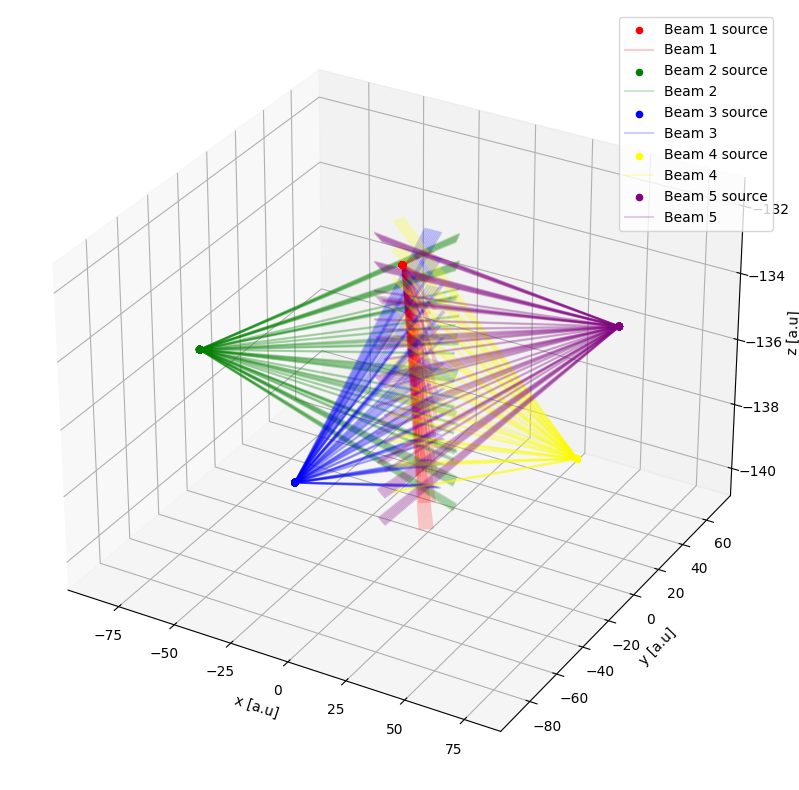

<Figure size 640x480 with 0 Axes>

In [ ]:
#ALL BEAMS PLOT
colors=["red", "green", "blue", "yellow", "purple"]
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel("x [a.u]")
ax.set_ylabel("y [a.u]")
ax.set_zlabel("z [a.u]")

for i in range(0,len(dfbeams_clean)):
  ax.scatter(dfbeams_clean[i]['x0'], dfbeams_clean[i]['y0'], dfbeams_clean[i]['z0'], c=colors[i], label="Beam "+ str(i+1) + " source") #plotting the source
  for j in range(0,dfbeams_clean[i].shape[0]):
    s=np.array([dfbeams_clean[i].at[j,'x0'],dfbeams_clean[i].at[j,'y0'],dfbeams_clean[i].at[j,'z0']]) #source position
    f=np.array([dfbeams_clean[i].at[j,'f_x'],dfbeams_clean[i].at[j,'f_y'],dfbeams_clean[i].at[j,'f_z']]) #versor
    t = np.linspace(0, 100, 2) #line parametrization
    line = s + np.outer(t, f)
    if j==1 : ax.plot(line[:,0], line[:,1], line[:,2], c=colors[i], label="Beam "+ str(i+1), alpha=0.2)
    else : ax.plot(line[:,0], line[:,1], line[:,2], c=colors[i], alpha=0.2)
_=ax.legend()
plt.show()

Estrapolazione Informazioni CT

In [ ]:
pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 14.9 MB/s eta 0:00:00


In [ ]:
import SimpleITK as sitk

In [ ]:
import SimpleITK as sitk
#https://simpleitk.readthedocs.io/en/master/fundamentalConcepts.html
#https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1Image.html
tac = sitk.ReadImage("/content/drive/MyDrive/Condiviso_Gab/plan_VMAT/optiDose_PZ3_doseduodeno5_dosedcrtl1.5_peso4_red10x5.mhd")
print("Tac array shape", tac.GetSize())
print("Voxel Spacing", tac.GetSpacing()) #gets in mm
tac_size = [float(tac.GetSize()[0])*float(tac.GetSpacing()[0]),float(tac.GetSize()[1])*float(tac.GetSpacing()[1]),float(tac.GetSize()[2])*float(tac.GetSpacing()[2])]
print(tac_size)

Tac array shape (512, 512, 184)
Voxel Spacing (1.292, 1.292, 3.0)
[661.504, 661.504, 552.0]


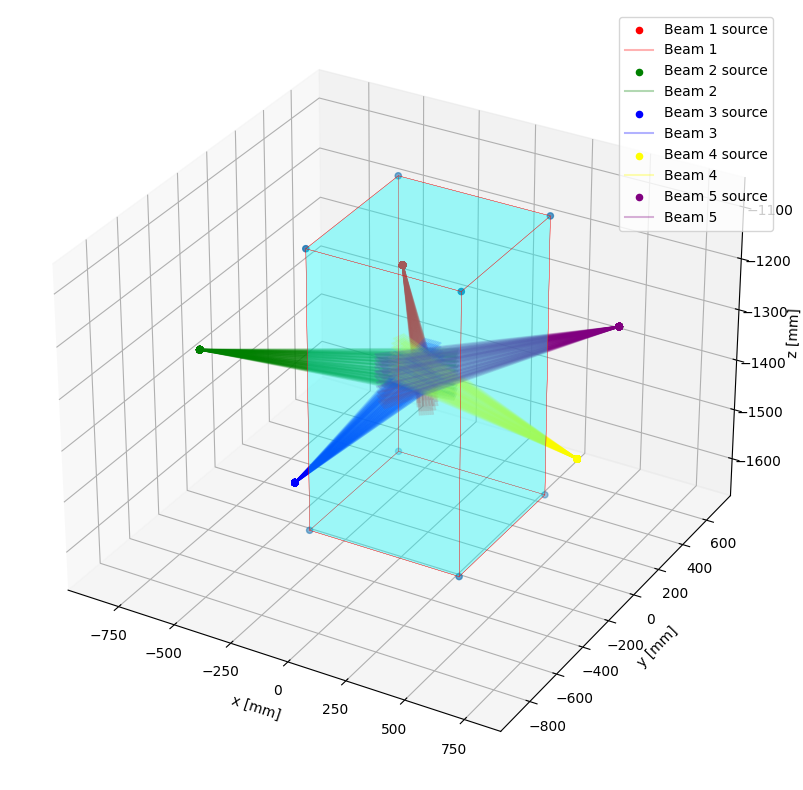

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")
ax.set_zlabel("z [mm]")

#Plotting the CT shape
v = np.array([[-tac_size[0]/2, -tac_size[1]/2, -1360-tac_size[2]/2], [tac_size[0]/2, -tac_size[1]/2, -1360-tac_size[2]/2], [-tac_size[0]/2, tac_size[1]/2, -1360-tac_size[2]/2],  [tac_size[0]/2, tac_size[1]/2, -1360-tac_size[2]/2], [-tac_size[0]/2, -tac_size[1]/2, -1360+tac_size[2]/2], [tac_size[0]/2, -tac_size[1]/2, -1360+tac_size[2]/2], [-tac_size[0]/2, tac_size[1]/2, -1360+tac_size[2]/2],  [tac_size[0]/2, tac_size[1]/2, -1360+tac_size[2]/2]])
ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])
verts = [[v[0],v[1],v[3],v[2]], [v[4],v[5],v[7],v[6]], [v[0],v[1],v[5],v[4]], [v[1],v[3],v[7],v[5]], [v[3],v[2],v[6],v[7]], [v[2],v[0],v[4],v[6]]]
ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=0.2, edgecolors='r', alpha=.2))

colors=["red", "green", "blue", "yellow", "purple"]

for i in range(0,len(dfbeams_clean)):
  ax.scatter(dfbeams_clean[i]['x0']*10, dfbeams_clean[i]['y0']*10, dfbeams_clean[i]['z0']*10, c=colors[i], label="Beam "+ str(i+1) + " source") #plotting the source
  for j in range(0,dfbeams_clean[i].shape[0]):
    s=np.array([dfbeams_clean[i].at[j,'x0']*10,dfbeams_clean[i].at[j,'y0']*10,dfbeams_clean[i].at[j,'z0']*10]) #source position
    f=np.array([dfbeams_clean[i].at[j,'f_x'],dfbeams_clean[i].at[j,'f_y'],dfbeams_clean[i].at[j,'f_z']]) #versor
    t = np.linspace(0, 1000, 2) #line parametrization
    line = s + np.outer(t, f)
    if j==1 : ax.plot(line[:,0], line[:,1], line[:,2], c=colors[i], label="Beam "+ str(i+1), alpha=0.3)
    else : ax.plot(line[:,0], line[:,1], line[:,2], c=colors[i], alpha=0.2)
_=ax.legend()

plt.show()